<a href="https://colab.research.google.com/github/luisfelipesdn12/Machine-Learning-with-COVID19/blob/master/Predictions_COVID19_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pedição com dados sobre a pandemia de Sars-Cov-2 no Brasil
> Prediction with data about Sars-Cov-2 Pandemy in Brazil

In [1]:
import __hello__

Hello world!


## Carregamento dos dados:
> Data loading:

Primeiro de tudo, precisamos carregar os dados e tranformá-los em um `dataframe` manipulável.

> First of all, is needed to load the data and transform it in a manipulable `dataframe`.

In [2]:
import pandas as pd

#Fonte = 'https://www.kaggle.com/unanimad/corona-virus-brazil#brazil_covid19.csv'
URI = '/content/brazil_covid19.csv'

dados = pd.read_csv(URI)
dados.head()

,date,region,state,cases,deaths
0,2020-01-30,Centro-Oeste,Distrito Federal,0,0
1,2020-01-30,Centro-Oeste,Goiás,0,0
2,2020-01-30,Centro-Oeste,Mato Grosso,0,0
3,2020-01-30,Centro-Oeste,Mato Grosso do Sul,0,0
4,2020-01-30,Nordeste,Alagoas,0,0


In [3]:
dados.describe()

,cases,deaths
count,2322.000000,2322.000000
mean,281.105082,16.294574
std,1196.433718,87.372534
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,87.750000,2.000000
max,17826.000000,1512.000000


In [4]:
 for column in dados.columns.values:
  print(f'\n{"="*5} {column} {"="*5}\n')
  print(dados[column].describe())


===== date =====

count           2322
unique            86
top       2020-03-06
freq              27
Name: date, dtype: object

===== region =====

count         2322
unique           5
top       Nordeste
freq           774
Name: region, dtype: object

===== state =====

count        2322
unique         27
top       Alagoas
freq           86
Name: state, dtype: object

===== cases =====

count     2322.000000
mean       281.105082
std       1196.433718
min          0.000000
25%          0.000000
50%          0.000000
75%         87.750000
max      17826.000000
Name: cases, dtype: float64

===== deaths =====

count    2322.000000
mean       16.294574
std        87.372534
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      1512.000000
Name: deaths, dtype: float64


## Predição da região:
> Region Prediction:

Meu objetivo primário é treinar um modelo de machine learning capaz de predizer a região do Brasil baseado no numero de casos e mortes reportados.
> My primary goal is to train a machine learning model able to predict the region of Brazil based on number of cases and deaths reported.

### "Limpesa" dos dados:
> Data clean:

Primeiramente, separaremos os dados que vamos fornecer para a máquina (`x`) e os dados que queremos que ela nos devolda (`y`).

Nesse caso, o `x` seriam as colunas de `casos` e `mortes`.

> First, We'll to separate the data used to provide to the machine (`x`) and the data we want the it returns.
>
> In case, the `x` would be the columns `cases` and `deaths`.

In [5]:
x_regiao = dados[['cases', 'deaths']]
print(x_regiao.describe())
x_regiao.sample(5)

              cases       deaths
count   2322.000000  2322.000000
mean     281.105082    16.294574
std     1196.433718    87.372534
min        0.000000     0.000000
25%        0.000000     0.000000
50%        0.000000     0.000000
75%       87.750000     2.000000
max    17826.000000  1512.000000


,cases,deaths
352,0,0
841,0,0
1023,0,0
1824,532,19
390,0,0


E o `y`, a coluna `região`.
> And the `y` the `region` column.

In [6]:
y_regiao = dados['region']
print(y_regiao.describe())
y_regiao.sample(5)

count         2322
unique           5
top       Nordeste
freq           774
Name: region, dtype: object


814         Nordeste
1932           Norte
1809    Centro-Oeste
2007        Nordeste
1128         Sudeste
Name: region, dtype: object

Ok, separamos os dados, mas ainda temos todos os dados de uma vez, o que não nos permitiria testar o modelos com novos dados que ele nunca viu. Então esse é o próximo passo: separar os dados de `x` e `y` em `teste` e `treino`.
> Allright, we've separated the data, but we still have all of them at once, what would not allow us to test the model with data that it never seen before. So this is the next step: separate the data of `x` and `y` in `test` and `train`.

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(3141592)

x_regiao_treino, x_regiao_teste, y_regiao_treino, y_regiao_teste = train_test_split(x_regiao, y_regiao)

print(x_regiao_treino.shape)
print(x_regiao_teste.shape)
print(y_regiao_treino.shape)
print(y_regiao_teste.shape)

(1741, 2)
(581, 2)
(1741,)
(581,)


### Treinamento do modelo:
> Training of the model:

Para treinar o modelo ultilizarei um algorítimo de classificação chamado `DecisionTreeClassifier`.
> To training the model I'll use a classificator algorithm called `DecisionTreeClassifier`.

In [8]:
# training:
from sklearn.tree import DecisionTreeClassifier

modelo_regiao = DecisionTreeClassifier()
modelo_regiao.fit(x_regiao_treino, y_regiao_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Uma vez treinado, vamos fazer um pequeno teste, para termos uma noção de que aparentemente deu certo.
> Once trained, we'll do a little test, to have an idea that apparently it worked. 

In [9]:
predicao_regiao = modelo_regiao.predict(x_regiao_teste)
predicao_regiao[:5]

array(['Nordeste', 'Sul', 'Nordeste', 'Nordeste', 'Nordeste'],
      dtype=object)

In [10]:
y_regiao_teste.to_numpy()[:5]

array(['Sul', 'Sul', 'Nordeste', 'Nordeste', 'Nordeste'], dtype=object)

Nessa pequena amostra dos 5 primeiros itens, vemos que o modelo só errou o primeiro, mas não podemos tirar conclusões precisas antes de ir para o próximo passo:
> In this little sample of the first 5 itens, we see that the model did just one mistake, but we can't take accurated conclusions before we go to the next step:

### Testando o modelo:
> Testing the model:

A biblioteca `sklearn` nos permite testar o modelo a partir de `métricas`. Fiz uma função que testa duas delas: `classification_report` e `accuracy_score`.

Para saber mais sobre as métricas do sklearn, [clique aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

> The `sklearn` library allow us to test the model from `metrics`. I made a function who test two of them: `classification_report` and `accuracy_score`.
>
> To know more of sklearn metrics, [click here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [0]:
from sklearn.metrics import classification_report, accuracy_score

def metricas_diversas(y_teste, predicao):
  for metric in [classification_report, accuracy_score]:
    metric_name = str(metric)[(str(metric).find('n ') + 2):(str(metric).find(' at '))]
    print(f'{"="*5} {metric_name} {"="*5}')
    print(metric(y_teste, predicao))

In [12]:
metricas_diversas(y_teste=y_regiao_teste, predicao=predicao_regiao)

===== classification_report =====
              precision    recall  f1-score   support

Centro-Oeste       0.50      0.20      0.29        89
    Nordeste       0.35      0.74      0.47       183
       Norte       0.44      0.18      0.25       162
     Sudeste       0.25      0.15      0.19        86
         Sul       0.36      0.20      0.26        61

    accuracy                           0.36       581
   macro avg       0.38      0.29      0.29       581
weighted avg       0.38      0.36      0.32       581

===== accuracy_score =====
0.35800344234079173


In [13]:
from sklearn.dummy import DummyClassifier

modelo_regiao_dummy = DummyClassifier()
modelo_regiao_dummy.fit(x_regiao_treino, y_regiao_treino)
dummy_predicoes_regiao = modelo_regiao_dummy.predict(x_regiao_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [14]:
metricas_diversas(y_teste=y_regiao_teste, predicao=dummy_predicoes_regiao)

===== classification_report =====
              precision    recall  f1-score   support

Centro-Oeste       0.12      0.11      0.12        89
    Nordeste       0.32      0.36      0.34       183
       Norte       0.26      0.23      0.25       162
     Sudeste       0.17      0.16      0.16        86
         Sul       0.12      0.13      0.13        61

    accuracy                           0.23       581
   macro avg       0.20      0.20      0.20       581
weighted avg       0.23      0.23      0.23       581

===== accuracy_score =====
0.23407917383820998


In [15]:
import statistics as stt

x_regiao_teste_colunas_separadas = [x_regiao_teste[coluna].to_list() for coluna in ['cases', 'deaths']]

x_regiao_teste_medias = list()

for c in range(len(x_regiao_teste_colunas_separadas[0])):
  media = stt.mean([
    x_regiao_teste_colunas_separadas[0][c],
    x_regiao_teste_colunas_separadas[1][c]
  ])
  x_regiao_teste_medias.append(media)

x_regiao_teste_medias[:5]

[0, 560, 0, 16, 45.5]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


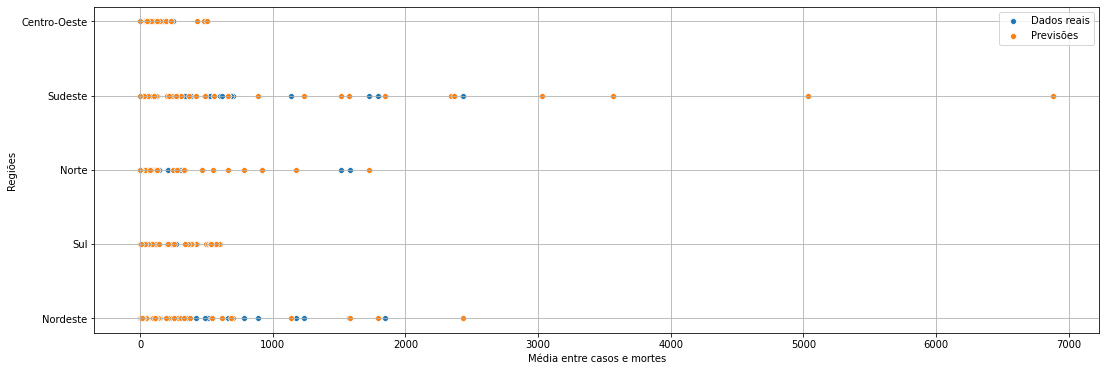

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,6))
plt.grid(True)
plt.ylabel('Regiões')
plt.xlabel('Média entre casos e mortes')

sns.scatterplot(x=x_regiao_teste_medias, y=predicao_regiao,)
sns.scatterplot(x=x_regiao_teste_medias, y=y_regiao_teste.values)
plt.legend(loc='upper right', labels=['Dados reais', 'Previsões'])
plt.show()

Vemos que nosso modelo não é tão bom. Mas talvez não seja apenas por causa dele em sí, pode ser que as variáveis de casos e mortes reportadas não tenham uma correlação tão grande com a região como esperávamos. 

Podemos tentar outra abordagem: fazer uma classificação binária a partir de dados dos casos e mortes mas tendo como `y` uma coluna binária que nos diz apenas se a região é ou não é do Sudeste, visto que parecem ter uma correlação mais constante uma vez que a densidade demográfica do Sudeste é bem maior que a das demais regiões.

> We see that our model is not so good. But maybe it don't is the only guilty, maybe the variables of cases and deaths reported don't have a correlation with the region as we expected.
>
> We can try a new approach: do a binary classification from data of cases and deaths but having the `y` as a binar column who tell us if a region is or not the southeast, seeing that the demographic density of southeast is much bigger than the that of the other regions.

## Predição da região binária:
> Binary region prediction:

Agora, veremos como se comportará um modelo treinado para classificar bináriamente como `Sudeste` ou `Não Sudestes`

### "Limpesa" dos dados:
> Data clean:

A primeira coisa a fazer é substituir a coluna `region` por uma coluna `is_southeast` com valores binários de `True` para sudeste e `False` para demais regiões.
> The first thing to do is replace the `region` columns for a `is_southeast` column with binary values of `True` to southeast and `False` to the others regions.

In [30]:
valores_unicos_coluna_regiao = list(dados['region'].unique())

replace_dict = dict()

for valor in valores_unicos_coluna_regiao:
  if valor == 'Sudeste': replace_dict[valor] = True
  else: replace_dict[valor] = False

dados_sudeste_binario = dados.replace(to_replace=replace_dict)
dados_sudeste_binario.rename(columns={"region": "is_southeast"}, inplace=True)
dados_sudeste_binario.sample(5)

,date,is_southeast,state,cases,deaths
2126,2020-04-17,True,Espírito Santo,856,25
1994,2020-04-12,True,São Paulo,8755,588
389,2020-02-13,False,Rio Grande do Norte,0,0
1789,2020-04-05,False,Maranhão,96,2
2043,2020-04-14,False,Roraima,113,3


In [31]:
x_sudeste_binario = dados_sudeste_binario[['cases', 'deaths']]
y_sudeste_binario = dados_sudeste_binario['is_southeast']


for i in [x_sudeste_binario, y_sudeste_binario]:
  print(f'\n{"="*10}\n')
  print(i.describe())
  print(i.sample(5))



              cases       deaths
count   2322.000000  2322.000000
mean     281.105082    16.294574
std     1196.433718    87.372534
min        0.000000     0.000000
25%        0.000000     0.000000
50%        0.000000     0.000000
75%       87.750000     2.000000
max    17826.000000  1512.000000
      cases  deaths
1454    745      30
1569     31       0
1625    176       1
1172      1       0
318       0       0


count      2322
unique        2
top       False
freq       1978
Name: is_southeast, dtype: object
590      True
973     False
1739    False
1861    False
597     False
Name: is_southeast, dtype: bool


In [19]:
np.random.seed(3141592)

x_sudeste_binario_treino, x_sudeste_binario_teste, y_sudeste_binario_treino, y_sudeste_binario_teste = train_test_split(x_sudeste_binario, y_sudeste_binario)

print(x_sudeste_binario_treino.shape)
print(x_sudeste_binario_teste.shape)
print(y_sudeste_binario_treino.shape)
print(y_sudeste_binario_teste.shape)

(1741, 2)
(581, 2)
(1741,)
(581,)


### Treinamento do modelo:
> Training of the model:

In [20]:
modelo_sudeste_binario = DecisionTreeClassifier()
modelo_sudeste_binario.fit(x_sudeste_binario_treino, y_sudeste_binario_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
predicao_sudeste_binario = modelo_sudeste_binario.predict(x_sudeste_binario_teste)
predicao_sudeste_binario[:5]

array([False,  True, False, False, False])

In [22]:
y_sudeste_binario_teste.to_numpy()[:5]

array([False, False, False, False, False])

### Testando o modelo:
> Testing the model:

In [23]:
metricas_diversas(predicao=predicao_sudeste_binario,
                  y_teste=y_sudeste_binario_teste)

===== classification_report =====
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       495
        True       0.21      0.09      0.13        86

    accuracy                           0.81       581
   macro avg       0.53      0.52      0.51       581
weighted avg       0.76      0.81      0.78       581

===== accuracy_score =====
0.8141135972461274


In [24]:
from sklearn.dummy import DummyClassifier

modelo_sudeste_binario_dummy = DummyClassifier()
modelo_sudeste_binario_dummy.fit(x_sudeste_binario_treino,
                                 y_sudeste_binario_treino)
dummy_predicoes_sudeste_binario = modelo_sudeste_binario_dummy.predict(x_sudeste_binario_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [25]:
metricas_diversas(predicao=dummy_predicoes_sudeste_binario, y_teste=y_sudeste_binario_teste)

===== classification_report =====
              precision    recall  f1-score   support

       False       0.86      0.85      0.86       495
        True       0.17      0.17      0.17        86

    accuracy                           0.75       581
   macro avg       0.51      0.51      0.51       581
weighted avg       0.76      0.75      0.75       581

===== accuracy_score =====
0.7538726333907056


Vemos que esse modelo se mostra muito melhor do que o anterior. Vamos visualizar isso abaixo:
> We see that this model appear be much better that the previous one. Let's visualize it bellow:

In [26]:
import statistics as stt

x_sudeste_binario_teste_colunas_separadas = [x_sudeste_binario_teste[coluna].to_list() for coluna in ['cases', 'deaths']]

x_sudeste_binario_teste_medias = list()

for c in range(len(x_sudeste_binario_teste_colunas_separadas[0])):
  media = stt.mean([
    x_sudeste_binario_teste_colunas_separadas[0][c],
    x_sudeste_binario_teste_colunas_separadas[1][c]
  ])
  x_sudeste_binario_teste_medias.append(media)

x_sudeste_binario_teste_medias[:5]

[0, 560, 0, 16, 45.5]

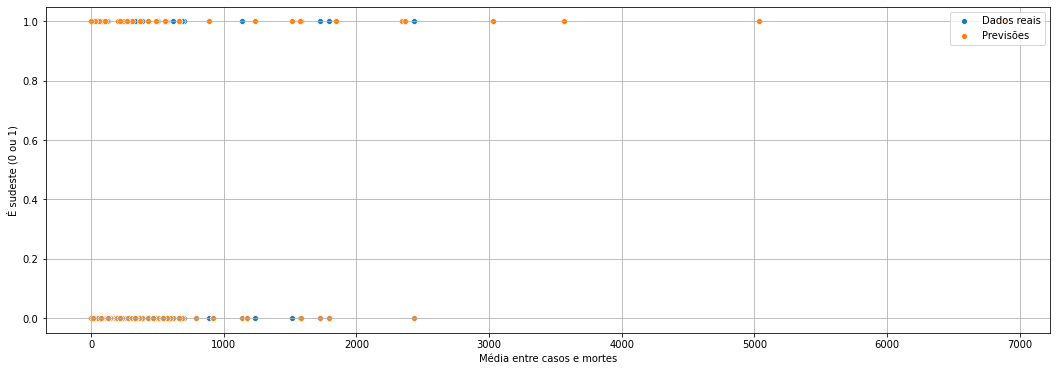

In [27]:
plt.figure(figsize=(18,6))
plt.grid(True)
plt.ylabel('É sudeste (0 ou 1)')
plt.xlabel('Média entre casos e mortes')
sns.scatterplot(x=x_sudeste_binario_teste_medias, y=predicao_sudeste_binario)
sns.scatterplot(x=x_sudeste_binario_teste_medias, y=y_sudeste_binario_teste.values)
plt.legend(loc='upper right', labels=['Dados reais', 'Previsões'])
plt.show()

A função abaixo permite inserir valores como parâmetro do número de casos (`n_cases`) e o número de mortes (`n_deaths`) reportados num dia, e receber como retorno se o modelo prediz que é ou não é no sudeste.
> The function bellow allow us to insert values as parameter of the number of cases (`n_cases`) e the number of deaths (`n_deaths`) reported in a day, and get as return if the model predict that is or is not in southeast.

In [0]:
def is_sudeste(n_cases:int, n_deaths:int):
  data = {
      'cases' : [n_cases],
      'deaths' : [n_deaths]
  }
  data = pd.DataFrame(data)

  is_sudeste = list(modelo_sudeste_binario.predict(data))[0] == True

  if is_sudeste: return('Eu acho que é Sudeste!')
  else: return('Eu acho que não é Sudeste!')

In [29]:
print(
    is_sudeste(
        n_cases= 1381,
        n_deaths= 42
    )
)

Eu acho que é Sudeste!
